# pvanalysis

The `pvanalysis` package of `SLAM` is a tool to identify Keplerian disks in protostellar systems using position-velocity (PV) diagrams and estimate the dynamical mass of protostars if disks are present. This tool basically consists of two steps: `get_edgeridge`, which determines edge/ridge points that trace rotation curve features of PV diagrams, and `fit_edgeridge`, which performs the power-law fitting with the obtained edge/ridge points. In this note, we will briefly present how to use this tool. Users can refer to the [manual](https://ui.adsabs.harvard.edu/abs/2023arXiv231107988A/abstract) for full details.

In [1]:
import numpy as np
# if you need to set a path
import sys
sys.path.append('../../../SLAM/') # add PATH to SLAM

from pvanalysis import PVAnalysis

## Basic usage

Here is an example only with the most basic input parameters to deomnstrate the simplest usage. The first step of `pvanalysis` is to extract edge/ridge points from a PV diagram.

In [2]:
# -------- INPUTS --------
fitsfile = '../../testfits/test.fits'
outname = 'pvanalysis'  # file name header for outputs
incl = 48.  # inclunation angle (deg)
vsys = 6.4  # systemic velocity (km/s)
dist = 140.  # distance to the object (pc)
rms = 1.7e-3  # rms noise level (Jy/beam)
thr = 5.  # threshold for noise cut-off for edge/ridge calculations (rms)
# -------------------------


# read PV diagram
# give rms, vsys, distance, and inclination angle
impv = PVAnalysis(fitsfile, rms, vsys, dist, incl=incl, pa=None)
# get edge/ridge points
impv.get_edgeridge(outname, thr=thr,)
impv.write_edgeridge(outname=outname)

read_pvfits: No PA information is given.
read_pvfits: Convert frequency to velocity
Along position axis.
x range: -5.00 -- 5.00 arcsec
v range: -0.00 -- 13.65 km/s
Along velocity axis.
x range: -5.00 -- 5.00 arcsec
v range: -0.00 -- 13.65 km/s
Derived points in pvanalysis.edge.dat and pvanalysis.ridge.dat.


In this example, edge/ridge points are obtained from emission above the given threshold ($5\sigma$) in the entire position-velocity (PV) diagram.

In the second step below, the power-law fitting is done with the obtained edge/ridge points. 

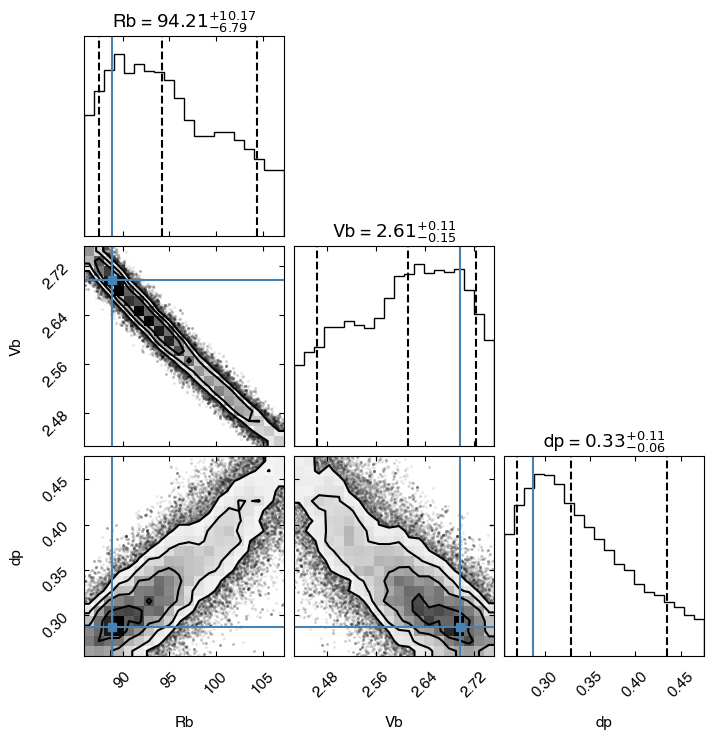

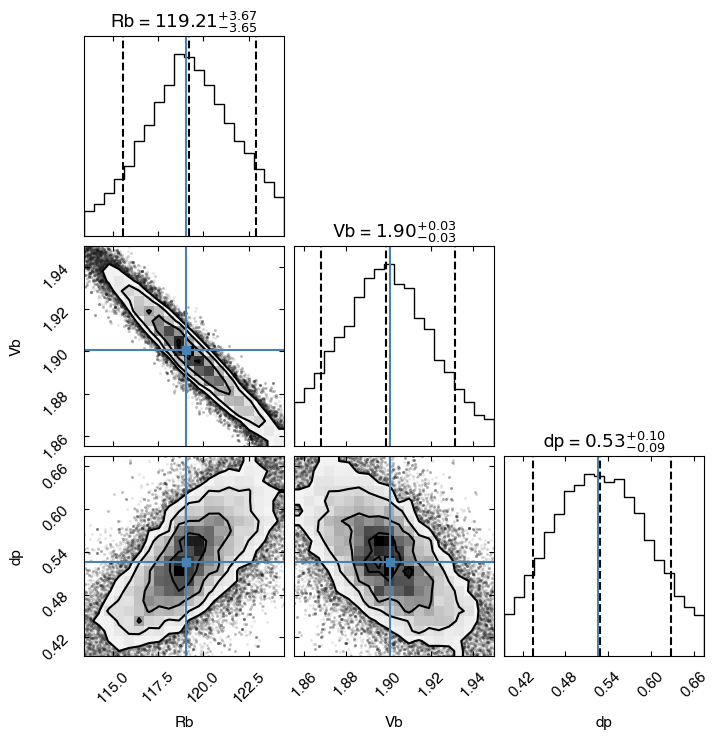

Corner plots in pvanalysis.corner_e.png and pvanalysis.corner_r.png
--- Edge ---
R_b   = 94.21 +/- 8.48 au
V_b   = 2.612 +/- 0.129 km/s
p_in  = 0.500 +/- 0.000
dp    = 0.329 +/- 0.083
v_sys = 6.400 +/- 0.000
r     = 38.24 --- 182.00 au
v     = 1.513 --- 4.100 km/s
M_in  = 1.312 +/- 0.175 Msun
M_out = 0.850 +/- 0.178 Msun
M_b   = 1.312 +/- 0.175 Msun
--- Ridge ---
R_b   = 119.21 +/- 3.66 au
V_b   = 1.899 +/- 0.031 km/s
p_in  = 0.500 +/- 0.000
dp    = 0.528 +/- 0.096
v_sys = 6.400 +/- 0.000
r     = 27.54 --- 161.00 au
v     = 1.394 --- 3.950 km/s
M_in  = 0.877 +/- 0.040 Msun
M_out = 0.639 +/- 0.059 Msun
M_b   = 0.877 +/- 0.040 Msun


In [3]:
# power law fitting
# --------- input parameters ----------
include_vsys = False  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
fixed_pin = 0.5  # Set the fixed pin value when include_pin is False.
fixed_dp = 0.0  # Set the fixed dp value when include_dp is False.
show_corner = True # if show corner plots or not
# -------------------------------------
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   fixed_pin=fixed_pin, fixed_dp=fixed_dp,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()

The input parameters set free parameters and which model function (single or double power-law) is adopted. In the above case, the fitting model is a double-power law function with a fixed inner power-law index ($p_\mathrm{in}=0.5$). The fitting searches the best break point ($R_\mathrm{b}$, $V_\mathrm{b}$), where the power-law index changes, and $dp$, which is deviation of the outer power-law index from the innder one. The dynamical mass ($M_\mathrm{b}$) is estimated from the set of ($R_\mathrm{b}$, $V_\mathrm{b}$) and a given inclination angle assuming a Keplerian rotation.

The edge/ridge points and the best-fit functions can be visualized as follows.

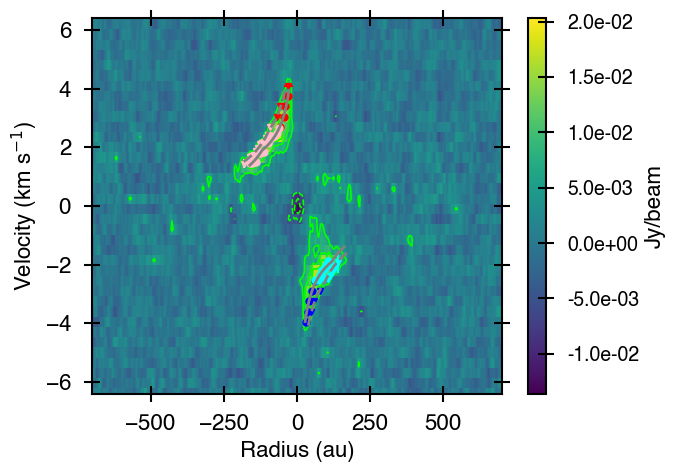

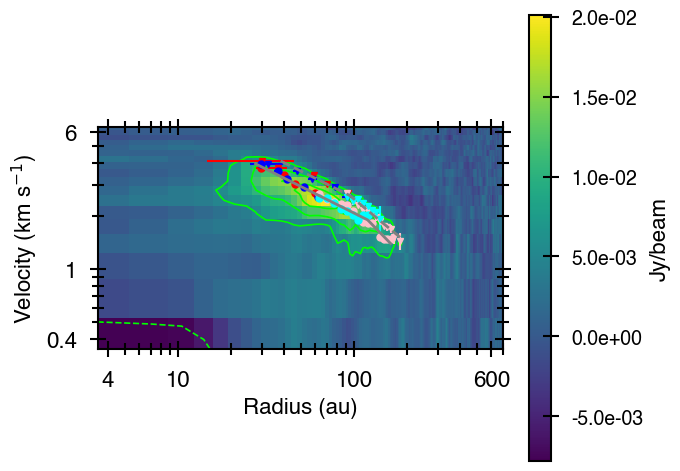

In [4]:
# plot results
impv.plot_fitresult(outname=outname, clevels=[-9,-6,-3,3,6,9],
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},)

## Advanced usage


### Detailed Setup
Here is a more advanced example with a full set of main parameters.

In [5]:
# -------- INPUTS --------
# Parameters of the target source and PV diagram
fitsfile = '../../testfits/test.fits'
outname = 'pvanalysis'  # file name header for outputs
incl = 48.  # inclination angle (deg)
pa = None # position angle (deg), used to calculate angular resolution along the cut direction if provided
vsys = 6.4  # systemic velocity (km/s)
dist = 140.  # distance (pc)
rms = 1.7e-3  # rms noise level (Jy/beam)
thr = 5.  # noise cut-off threshold for edge/ridge calculations (rms)

# Parameters for calculations of edge/ridge points
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-200, 0, 0, 200]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, 0, 0, 5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
nanbeforemax = True
nanopposite = True
nanbeforecross = True

# Parameters for power-law fitting
include_vsys = False  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
fixed_pin = 0.5  # Fixed pin when include_pin is False.
fixed_dp = 0.0  # Fixed dp when include_dp is False.
show_corner = True  # figures will be made regardless of this option.
calc_evidence = True # If calculate Bayesian evidence or not.

# for plot
xlim_plot = [200. / 20., 200.]  # au; [inlim, outlim]
vlim_plot = [6. / 20., 6.]  # km/s
# ------------------------

These input parameters are to tune how to select edge/ridge points that better represent rotation curves, and free and fixed parameters for the power-law fitting.

With these input parameters, the analysis goes as follows.

read_pvfits: No PA information is given.
read_pvfits: Convert frequency to velocity
Along position axis.
x range: -1.42 -- 1.42 arcsec
v range: 1.75 -- 11.20 km/s
Along velocity axis.
x range: -1.42 -- 1.42 arcsec
v range: 1.75 -- 11.20 km/s
Derived points in pvanalysis.edge.dat and pvanalysis.ridge.dat.


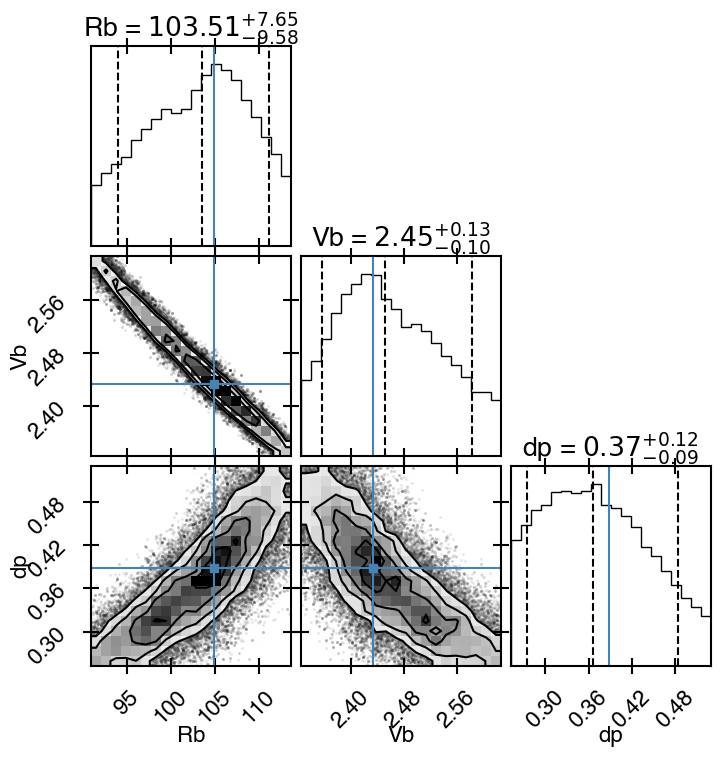

Evidence: 1.73e-15 +/- 1.35e-16
[edge]


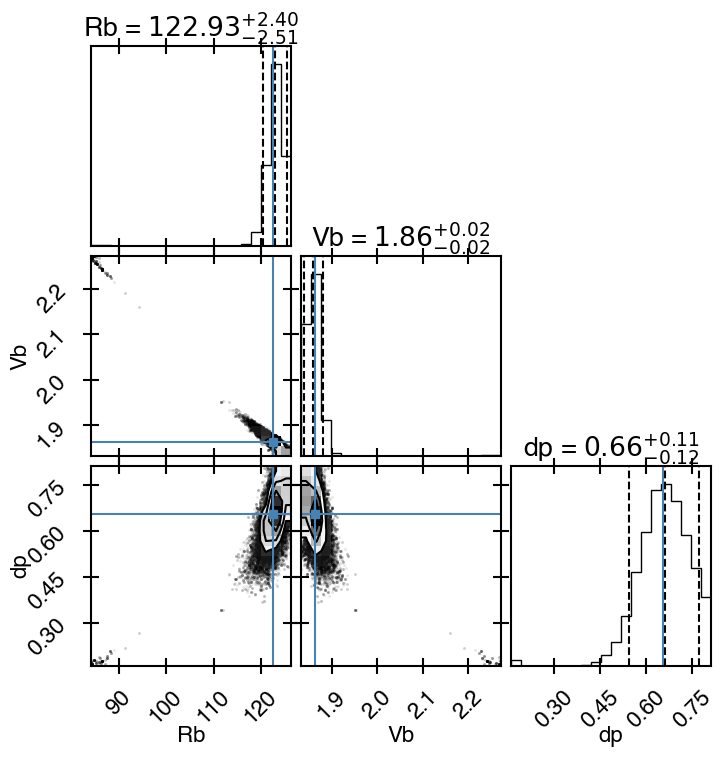

Evidence: 7.27e-42 +/- 6.41e-43
[ridge]
Corner plots in pvanalysis.corner_e.png and pvanalysis.corner_r.png
--- Edge ---
R_b   = 103.51 +/- 8.61 au
V_b   = 2.452 +/- 0.114 km/s
p_in  = 0.500 +/- 0.000
dp    = 0.366 +/- 0.105
v_sys = 6.400 +/- 0.000
r     = 37.01 --- 185.50 au
v     = 1.479 --- 4.100 km/s
M_in  = 1.270 +/- 0.158 Msun
M_out = 0.828 +/- 0.174 Msun
M_b   = 1.270 +/- 0.158 Msun
--- Ridge ---
R_b   = 122.93 +/- 2.45 au
V_b   = 1.859 +/- 0.021 km/s
p_in  = 0.500 +/- 0.000
dp    = 0.660 +/- 0.113
v_sys = 6.400 +/- 0.000
r     = 27.23 --- 157.50 au
v     = 1.395 --- 3.950 km/s
M_in  = 0.867 +/- 0.026 Msun
M_out = 0.625 +/- 0.048 Msun
M_b   = 0.867 +/- 0.026 Msun


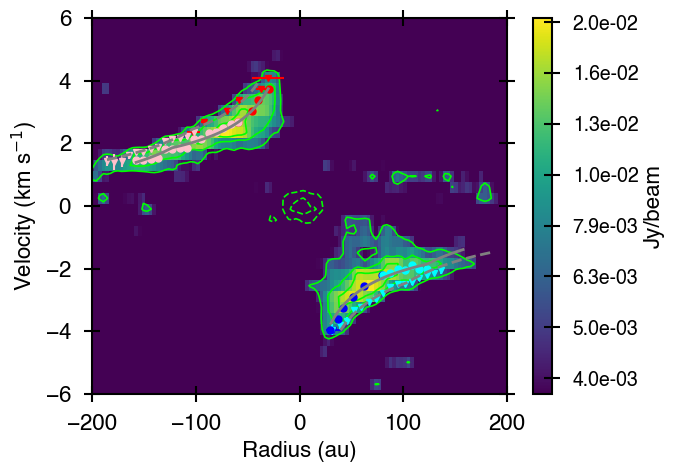

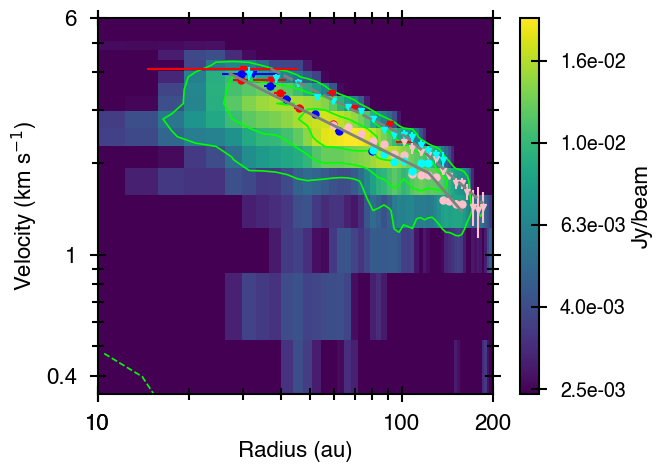

In [9]:
# run all once
impv = PVAnalysis(fitsfile, rms, vsys, dist, incl=incl, pa=None)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=nanbeforemax, nanopposite=nanopposite, 
                   nanbeforecross=nanbeforecross)
impv.write_edgeridge(outname=outname)
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   fixed_pin=fixed_pin, fixed_dp=fixed_dp,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner, calc_evidence=calc_evidence)
impv.output_fitresult()
impv.plot_fitresult(vlim=vlim_plot, xlim=xlim_plot, flipaxis=False,
                    clevels=[-9,-6,-3,3,6,9], outname=outname,
                    show=True, logcolor=True, Tbcolor=False,
                    kwargs_pcolormesh={'cmap':'viridis'},
                    kwargs_contour={'colors':'lime'},
                    fmt={'edge':'v', 'ridge':'o'},
                    linestyle={'edge':'--', 'ridge':'-'},
                    plotridgepoint=True, plotedgepoint=True,
                    plotridgemodel=True, plotedgemodel=True)

### Prior and Posterior

The uniform distribution is adopted for the prior in the MCMC fitting. The preset prior for $R_\mathrm{b}$ and $V_\mathrm{b}$ is over the radial and velocity ranges of the obtained ridge and edge points, respectively. The preset prior for $p_\mathrm{in}$, $dp$ and $V_\mathrm{sys}$ are $0.01 < p_\mathrm{in} < 10$, $0 < dp < 10$ and $V_\mathrm{sys,given} - 1 < V_\mathrm{sys} < V_\mathrm{sys,given} + 1$, respectively. These parameter ranges sufficiently cover typical values of the parameters. The top 80\% of the posterior will be plotted with the default setting.

One might want to modify the prior and plots of the posterior in some cases, e.g., to check and omit local minima other than the best solution. The prior and plot setting for the posterior can be manually set as follows:

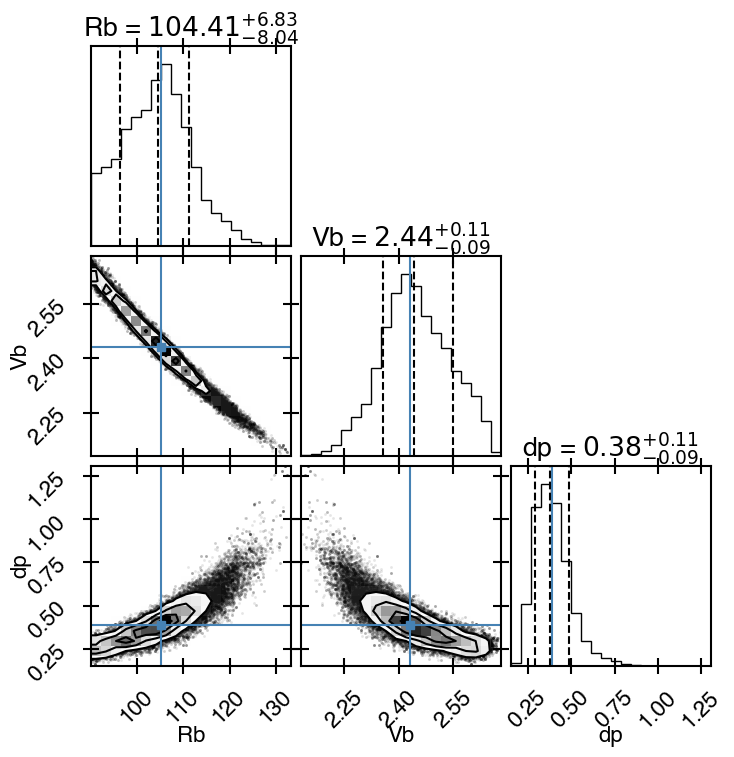

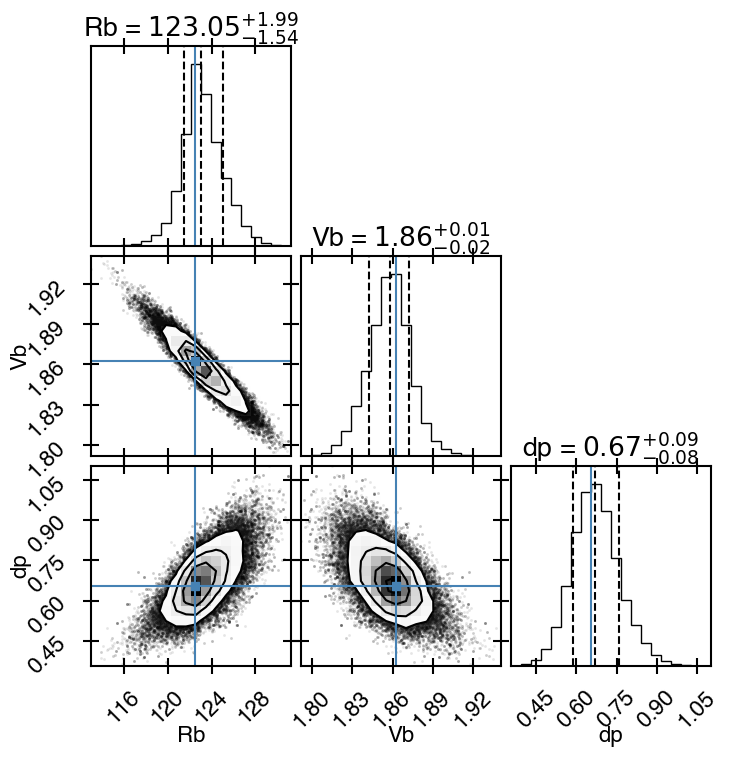

Corner plots in pvanalysis.corner_e.png and pvanalysis.corner_r.png
--- Edge ---
R_b   = 104.41 +/- 7.43 au
V_b   = 2.441 +/- 0.097 km/s
p_in  = 0.500 +/- 0.000
dp    = 0.379 +/- 0.097
v_sys = 6.400 +/- 0.000
r     = 37.01 --- 185.50 au
v     = 1.479 --- 4.100 km/s
M_in  = 1.270 +/- 0.135 Msun
M_out = 0.828 +/- 0.153 Msun
M_b   = 1.270 +/- 0.135 Msun
--- Ridge ---
R_b   = 123.05 +/- 1.77 au
V_b   = 1.858 +/- 0.015 km/s
p_in  = 0.500 +/- 0.000
dp    = 0.669 +/- 0.086
v_sys = 6.400 +/- 0.000
r     = 27.23 --- 157.50 au
v     = 1.395 --- 3.950 km/s
M_in  = 0.867 +/- 0.019 Msun
M_out = 0.625 +/- 0.035 Msun
M_b   = 0.867 +/- 0.019 Msun


In [12]:
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   fixed_pin=fixed_pin, fixed_dp=fixed_dp,
                   outname=outname,
                   show_corner=show_corner,
                   # parameters to manually set the prior and change plot setting for the posterior
                   rb_range = [90., 140.], # prior range for Rb
                   vb_range = [1., 5.], # for Vb
                   pin_range = [0.1, 10.], # for p_in
                   dp_range = [0., 2.], # for dp
                   vsys_range = [-0.5, 0.5], # for Vsys
                   rangelevel=1.0, # top rangelevel x 100 % of the posterior will be plotted
                  )
impv.output_fitresult()